# Partial plot and variable importance in h20
``` r
library(h2o)
h2o.init(nthreads = -1)
prostate.path = system.file("extdata", "prostate.csv", package="h2o")
prostate.hex = h2o.uploadFile(path = prostate.path, destination_frame = "prostate.hex")
prostate.hex[, "CAPSULE"] <- as.factor(prostate.hex[, "CAPSULE"] )
prostate.hex[, "RACE"] <- as.factor(prostate.hex[,"RACE"] )
prostate.gbm = h2o.gbm(x = c("AGE","RACE", "DPROS", "DCAPS", "PSA", "VOL", "GLEASON"),
                       y = "CAPSULE",
                       training_frame = prostate.hex,
                       ntrees = 10,
                       max_depth = 5,
                       learn_rate = 0.1)
h2o.partialPlot(object = prostate.gbm, data = prostate.hex, cols = c("AGE", "RACE"))


**Note:** the above mentioned library is a REST interface to JVM based code base
the partial plot on gbm is only works in the global space, there is no option to get information at the for individual prediction.


Things to note:
1. The current implementation is supported for regression and binomial classification models.
Reference: https://github.com/h2oai/h2o-3/blob/master/h2o-core/src/main/java/hex/PartialDependence.java
2. Gritty details of thread-safety, algorithm parallelism, and node coherence on a network are concealed by simple-to-use REST calls
3. The level of support for R binding is different compared to that of python. Seems like the support in R could be language agnostic(need to check more). In python partial_plot and varimp is supported for the following mentioned model types: * gbm, distributed random forest(drf), deep-learning
Reference: https://a-ghorbani.github.io/2016/11/24/data-science-with-h2o#interpretation-of-the-model
4. No support for interpretation for individual prediction
5. Also, there seems to be activity and continuous development around interepretation on their end as well
Reference: https://github.com/h2oai/h2o-3/blob/907a9676aa81a2ce968e51d776a26f680f192f2b/h2o-py/h2o/model/model_base.py
```

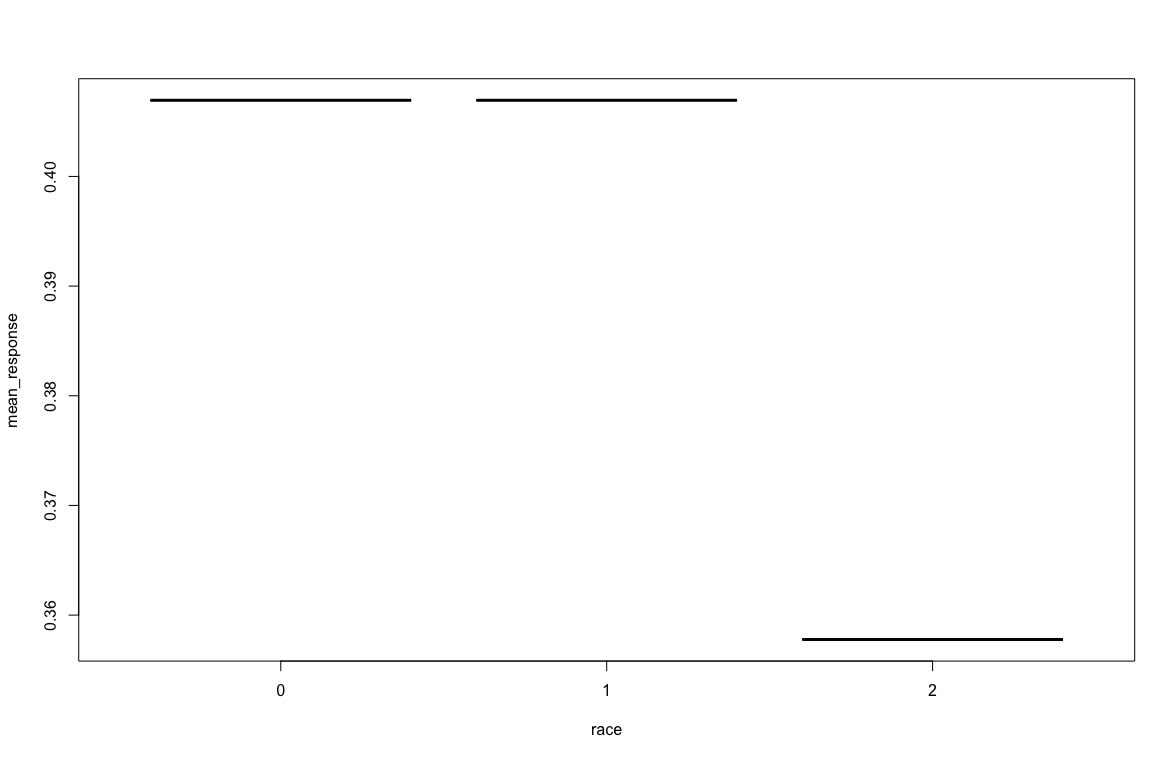

In [13]:
from IPython.display import Image
Image(filename='/home/deploy/pramit/h20_partial_plot.png')

# Variable importance in h20
``` r
h2o.varimp_plot(prostate.gbm)
h2o.varimp(prostate.gbm)
```

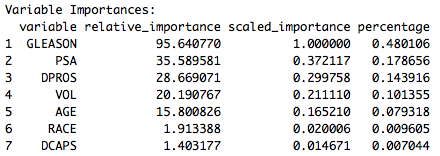

In [18]:
from IPython.display import Image
Image(filename='/home/deploy/pramit/var_importance.png')

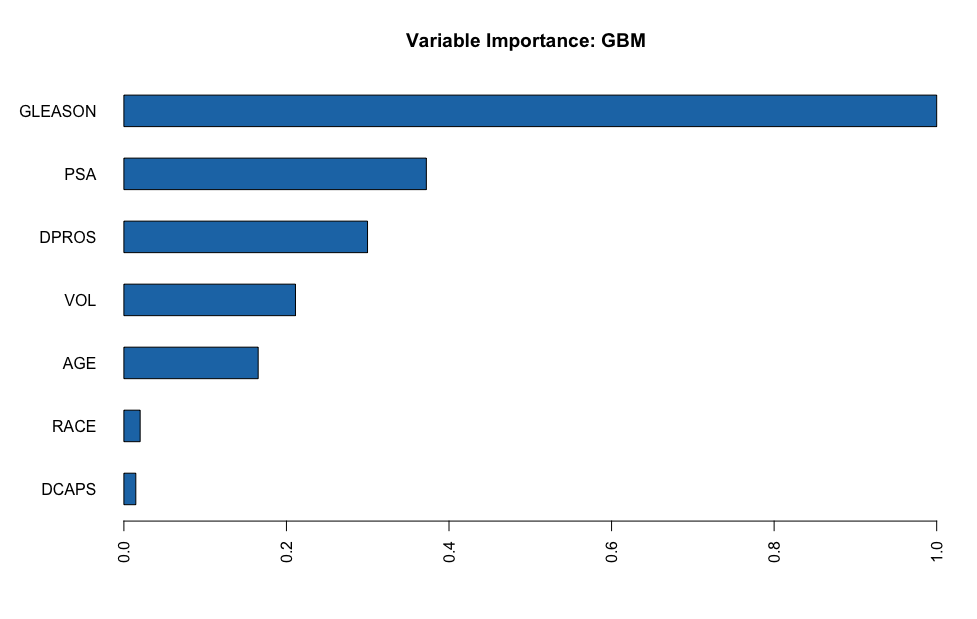

In [20]:
Image(filename='/home/deploy/pramit/variable_importance_plot.png')

# In python

In [31]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
# Initializes the REST server(dumps the h2o.jar at the right location and starts the server)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,27 mins 33 secs
H2O cluster version:,3.10.3.4
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_unknownUser_yhrcgh
H2O cluster total nodes:,1
H2O cluster free memory:,6.783 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [25]:
h2o.cluster().show_status()

H2O cluster uptime:,5 mins 39 secs
H2O cluster version:,3.10.3.4
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_unknownUser_yhrcgh
H2O cluster total nodes:,1
H2O cluster free memory:,6.783 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [30]:
df = h2o.import_file(path="/usr/local/lib/python2.7/dist-packages/h2o/h2o_data/prostate.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [32]:
model = H2OGradientBoostingEstimator(ntrees=10, max_depth=5)     # setup the gbm

In [38]:
df['CAPSULE'] = df['CAPSULE'].asfactor()
df['RACE'] = df['RACE'].asfactor()

In [41]:
# Describe the data
df.describe()

Rows:380
Cols:9




,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
type,int,enum,int,enum,int,int,real,real,int
mins,1.0,,43.0,,1.0,1.0,0.3,0.0,0.0
mean,190.5,,66.0394736842,,2.27105263158,1.10789473684,15.4086315789,15.8129210526,6.38421052632
maxs,380.0,,79.0,,4.0,2.0,139.7,97.6,9.0
sigma,109.840793879,,6.52707126917,,1.00010761815,0.310656449351,19.9975726686,18.3476199673,1.09195337443
zeros,0,,0,,0,0,0,167,2
missing,0,0,0,0,0,0,0,0,0
0,1.0,0,65.0,1,2.0,1.0,1.4,0.0,6.0
1,2.0,0,72.0,1,3.0,2.0,6.7,0.0,7.0
2,3.0,0,70.0,1,1.0,2.0,4.9,0.0,6.0


In [48]:
m = model.train(x=df.names[2:], y="CAPSULE", training_frame=df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
# 
model.partial_plot(data=df, cols=["AGE", "RACE", "DPROS"], destination_key=None, nbins=20, plot=True, figsize=(7, 10), 
                   server=False)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependence: Partial Dependence Plot of model GBM_model_python_1486420778677_47 on column 'AGE'



age,mean_response
43.0,0.4154350
44.8947368,0.4154350
46.7894737,0.4154350
48.6842105,0.4154350
50.5789474,0.4154350
52.4736842,0.4154350
54.3684211,0.4154350
56.2631579,0.4154350
58.1578947,0.4154350
60.0526316,0.4154350


PartialDependence: Partial Dependence Plot of model GBM_model_python_1486420778677_47 on column 'RACE'



race,mean_response
0,0.3935755
1,0.4066064
2,0.3897059


PartialDependence: Partial Dependence Plot of model GBM_model_python_1486420778677_47 on column 'DPROS'



dpros,mean_response
1.0,0.3218900
2.0,0.3842396
3.0,0.4772137
4.0,0.4772137


[, , ]

In [56]:
model.varimp_plot
#Reference: http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/_modules/h2o/model/model_base.html#ModelBase.varimp_plot

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1486420778677_47


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.140341080885
RMSE: 0.374621249911
LogLoss: 0.45365301443
Mean Per-Class Error: 0.168250266333
AUC: 0.924937375831
Gini: 0.849874751663
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.312930079348: 


,0,1,Error,Rate
0,161.0,66.0,0.2907,(66.0/227.0)
1,7.0,146.0,0.0458,(7.0/153.0)
Total,168.0,212.0,0.1921,(73.0/380.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3129301,0.8,148.0
max f2,0.3025831,0.8915663,153.0
max f0point5,0.5543955,0.8584071,68.0
max accuracy,0.5464595,0.8394737,72.0
max precision,0.7908491,1.0,0.0
max recall,0.2523601,1.0,188.0
max specificity,0.7908491,1.0,0.0
max absolute_mcc,0.5464595,0.6723547,72.0
max min_per_class_accuracy,0.4015139,0.8105727,120.0
max mean_per_class_accuracy,0.3129301,0.8317497,148.0


Gains/Lift Table: Avg response rate: 40.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105263,0.7849442,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0261438,148.3660131,148.3660131
,2,0.0263158,0.7832099,2.4836601,2.4836601,1.0,1.0,0.0392157,0.0653595,148.3660131,148.3660131
,3,0.0315789,0.7741428,2.4836601,2.4836601,1.0,1.0,0.0130719,0.0784314,148.3660131,148.3660131
,4,0.0421053,0.7581510,2.4836601,2.4836601,1.0,1.0,0.0261438,0.1045752,148.3660131,148.3660131
,5,0.05,0.7482833,2.4836601,2.4836601,1.0,1.0,0.0196078,0.1241830,148.3660131,148.3660131
,6,0.1,0.6736199,2.4836601,2.4836601,1.0,1.0,0.1241830,0.2483660,148.3660131,148.3660131
,7,0.1526316,0.6399633,2.3594771,2.4408384,0.95,0.9827586,0.1241830,0.3725490,135.9477124,144.0838404
,8,0.2078947,0.6109852,2.1288515,2.3579052,0.8571429,0.9493671,0.1176471,0.4901961,112.8851541,135.7905187
,9,0.3,0.5246481,1.9869281,2.2440087,0.8,0.9035088,0.1830065,0.6732026,98.6928105,124.4008715
,10,0.4,0.4351964,1.0457516,1.9444444,0.4210526,0.7828947,0.1045752,0.7777778,4.5751634,94.4444444



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2017-02-06 23:16:35,0.002 sec,0.0,0.4904278,0.6740643,0.5,1.0,0.5973684
,2017-02-06 23:16:35,0.019 sec,1.0,0.4692514,0.6319753,0.8816907,2.4836601,0.2105263
,2017-02-06 23:16:35,0.034 sec,2.0,0.4513608,0.5976672,0.8944603,2.4836601,0.1868421
,2017-02-06 23:16:35,0.049 sec,3.0,0.4374238,0.5714537,0.9003484,2.4836601,0.2078947
,2017-02-06 23:16:35,0.064 sec,4.0,0.4255895,0.5493087,0.8994126,2.4836601,0.2052632
,2017-02-06 23:16:35,0.078 sec,5.0,0.4148687,0.5293999,0.9048113,2.4836601,0.2052632
,2017-02-06 23:16:35,0.093 sec,6.0,0.4055438,0.5119414,0.9103107,2.4836601,0.1815789
,2017-02-06 23:16:35,0.109 sec,7.0,0.3976634,0.4969523,0.9116495,2.4836601,0.1894737
,2017-02-06 23:16:35,0.124 sec,8.0,0.3884752,0.4799125,0.9194956,2.4836601,0.1789474
,2017-02-06 23:16:35,0.140 sec,9.0,0.3809036,0.4655144,0.9227779,2.4836601,0.1815789


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
GLEASON,96.2562790,1.0,0.4758718
PSA,37.5827179,0.3904443,0.1858014
DPROS,29.1058922,0.3023792,0.1438937
VOL,23.1322231,0.2403191,0.1143611
AGE,13.5111370,0.1403663,0.0667964
RACE,1.9266759,0.0200161,0.0095251
DCAPS,0.7586447,0.0078815,0.0037506


<bound method H2OGradientBoostingEstimator.varimp_plot of >